# Data Loading

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [ ]:
# load the dataset
!curl -L -o sleep-health-and-lifestyle-dataset.zip\
  https://www.kaggle.com/api/v1/datasets/download/uom190346a/sleep-health-and-lifestyle-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  2604  100  2604    0     0   6762      0 --:--:-- --:--:-- --:--:--  6762


In [ ]:
df = pd.read_csv('sleep-health-and-lifestyle-dataset.zip')
df.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
df.drop(['Person ID'], axis=1, inplace=True)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [ ]:
# Fungsi kategorisasi
def categorize_stress(level):
    if level <= 3:
        return 1
    elif level <= 7:
        return 2
    else:
        return 3

# Terapkan ke kolom
df['Stress Level'] = df['Stress Level'].apply(categorize_stress)
df.head()

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,2,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,3,Normal,125/80,75,10000,NaN
2,Male,28,Doctor,6.2,6,60,3,Normal,125/80,75,10000,NaN
3,Male,28,Sales Representative,5.9,4,30,3,Obese,140/90,85,3000,Sleep Apnea
4,Male,28,Sales Representative,5.9,4,30,3,Obese,140/90,85,3000,Sleep Apnea


# Exploratory Data Analysis - Deskripsi Variabel

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   374 non-null    object 
 1   Age                      374 non-null    int64  
 2   Occupation               374 non-null    object 
 3   Sleep Duration           374 non-null    float64
 4   Quality of Sleep         374 non-null    int64  
 5   Physical Activity Level  374 non-null    int64  
 6   Stress Level             374 non-null    int64  
 7   BMI Category             374 non-null    object 
 8   Blood Pressure           374 non-null    object 
 9   Heart Rate               374 non-null    int64  
 10  Daily Steps              374 non-null    int64  
 11  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 35.2+ KB


In [ ]:
df.describe()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,1.997326,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,0.614824,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,1.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,2.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,2.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,2.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,3.000000,86.000000,10000.000000


## Menangani Missing Value

In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(0)
df['Sleep Disorder'] = df['Sleep Disorder'].replace('None', 0)
df.isnull().sum()

,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0
Heart Rate,0


## Menangani Outliers

In [ ]:
# Deteksi Outlier dengan metode IQR
def detect_outliers(data):
    outlier_summary = {}
    for column in data.select_dtypes(include=np.number).columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_summary[column] = len(outliers)

    return outlier_summary

# Menjalankan fungsi untuk dataset (tanpa kolom target)
indicators_columns = df.drop(columns=['Stress Level'], errors='ignore')
outlier_counts = detect_outliers(indicators_columns)

# Menampilkan jumlah outlier per kolom
print("Jumlah outlier per kolom:")
for col, count in outlier_counts.items():
    print(f"{col}: {count}")

Jumlah outlier per kolom:
Age: 0
Sleep Duration: 0
Quality of Sleep: 0
Physical Activity Level: 0
Heart Rate: 15
Daily Steps: 0


In [ ]:
# Mengelompokkan fitur numerik kecuali kolom target 'outcome'
indicators_feature = df.select_dtypes(include=np.number).drop(columns=['Outcome'], errors='ignore').columns

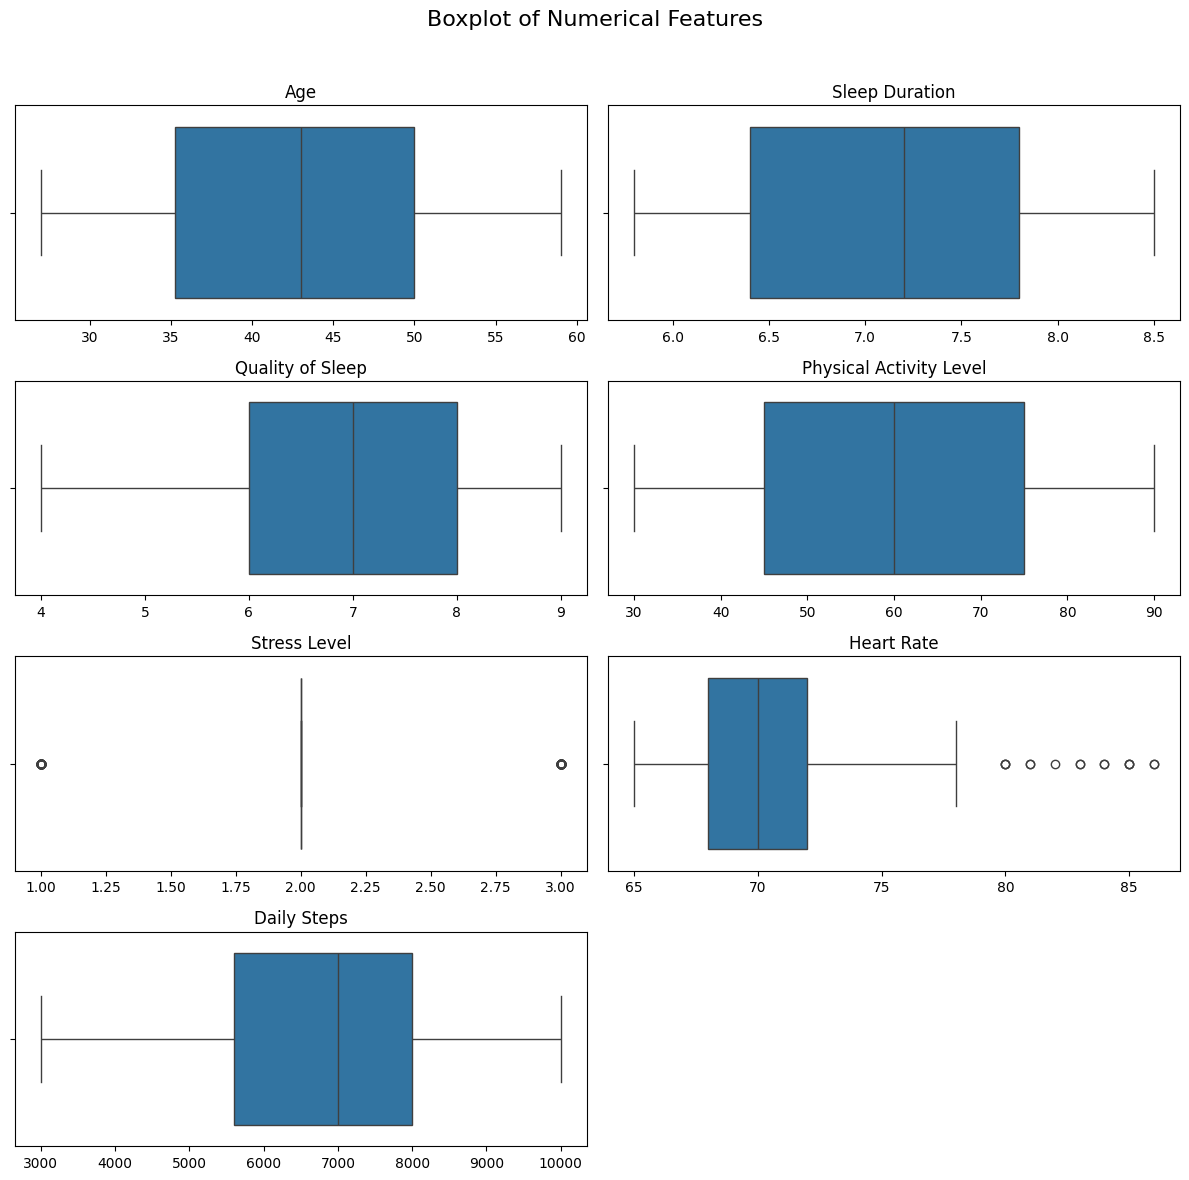

In [ ]:
import math

# Hitung jumlah baris dan kolom dinamis (misalnya grid 4x2 atau 3x4 tergantung jumlah fitur)
n_features = len(indicators_feature)
n_cols = 2
n_rows = math.ceil(n_features / n_cols)

# Buat grid
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, n_rows * 3))
fig.suptitle('Boxplot of Numerical Features', fontsize=16)

# Flatten axes supaya bisa di-loop
axes = axes.flatten()

# Plot tiap fitur
for i, feature in enumerate(indicators_feature):
    sns.boxplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('')

# Sembunyikan subplot kosong
for j in range(len(indicators_feature), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Fungsi untuk menghapus outlier dengan metode IQR
df_clean = df.copy()
def remove_outliers(df, columns):
    df_clean = df.copy()
    columns = [col for col in columns if col != 'Stress Level']
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean

# Hapus outlier
df_clean = remove_outliers(df_clean, indicators_feature)

# Tampilkan informasi perubahan
print("Outlier Berhasil Dihapus")

Outlier Berhasil Dihapus


In [ ]:
print(f"Jumlah baris sebelum data cleansing: {df.shape[0]}")
print(f"Jumlah baris sesudah data cleansing: {df_clean.shape[0]}")

Jumlah baris sebelum data cleansing: 374
Jumlah baris sesudah data cleansing: 359


## Univariate Analysis

### Categorical Feature

In [ ]:
numerical_features = ['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Heart Rate', 'Daily Steps']
categorical_features = ['Gender', 'Occupation', 'BMI Category', 'Blood Pressure', 'Sleep Disorder']

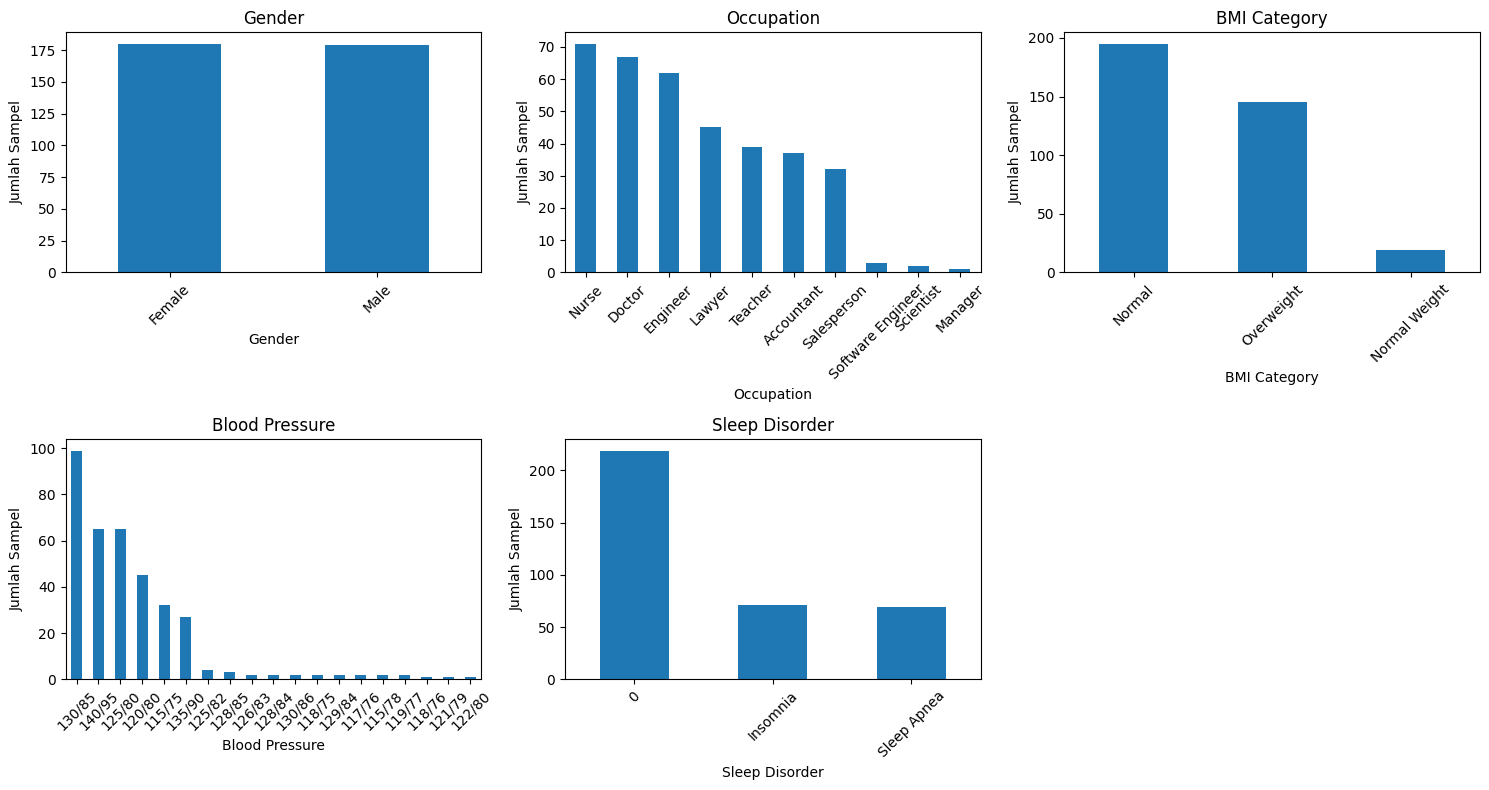

In [ ]:
n = len(categorical_features)
ncols = 3
nrows = (n + ncols - 1) // ncols

plt.figure(figsize=(5 * ncols, 4 * nrows))

for i, feature in enumerate(categorical_features, 1):
    count = df_clean[feature].value_counts()
    percent = 100 * df_clean[feature].value_counts(normalize=True)

    plt.subplot(nrows, ncols, i)
    count.plot(kind='bar')
    plt.title(feature)
    plt.ylabel("Jumlah Sampel")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Numerical Feature

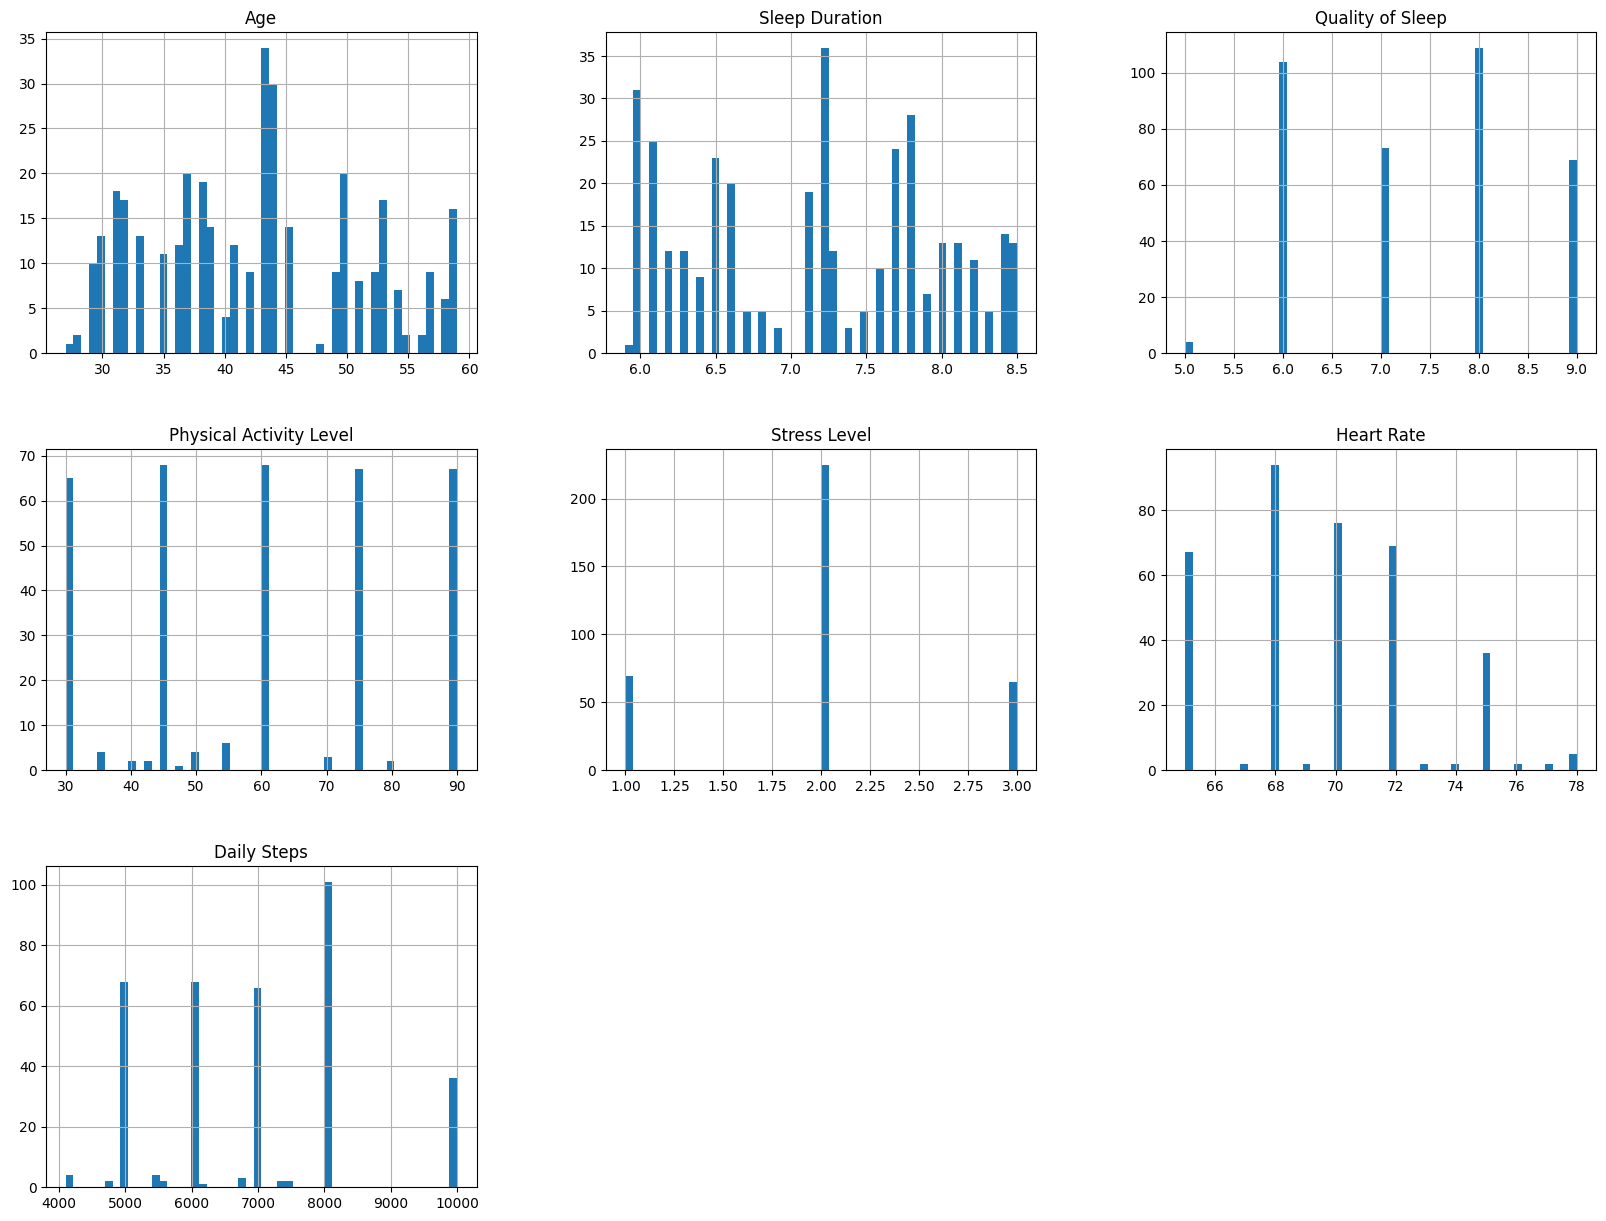

In [ ]:
df_clean.hist(bins=50, figsize=(20,15))
plt.show()

## Exploratory Data Analysis - Multivariate Analysis

### Categorical Feature

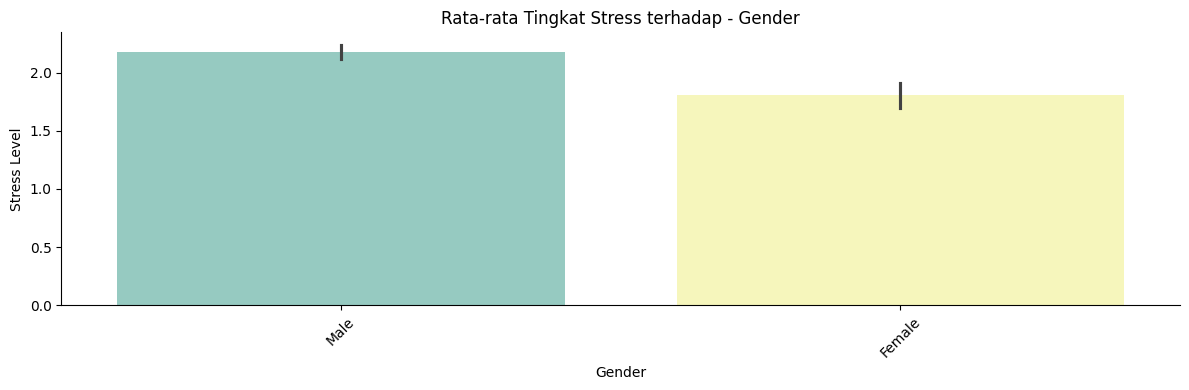

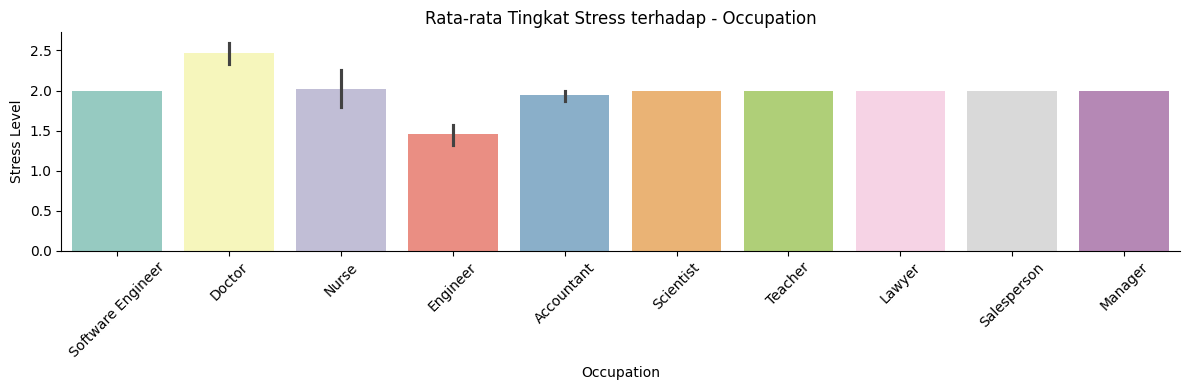

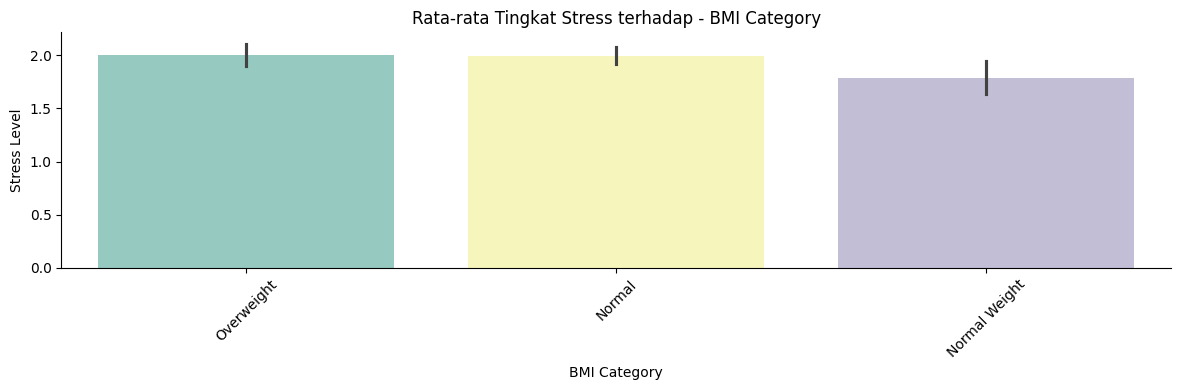

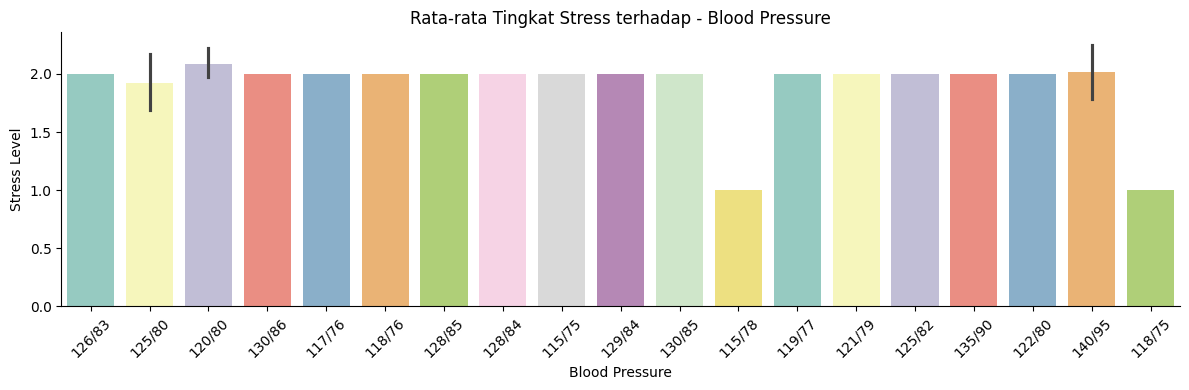

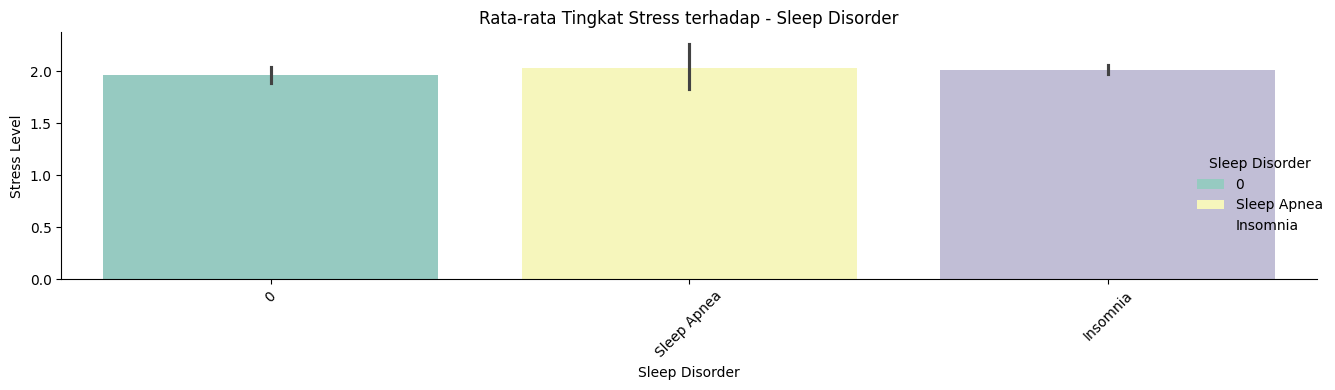

In [ ]:
cat_features = df_clean.select_dtypes(include='object').columns.to_list()

for col in cat_features:
    sns.catplot(
        x=col, y="Stress Level",
        hue=col,
        kind="bar", dodge=False,
        height=4, aspect=3,
        data=df_clean, palette="Set3"
    )
    plt.title(f"Rata-rata Tingkat Stress terhadap - {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

### Numerical Feature

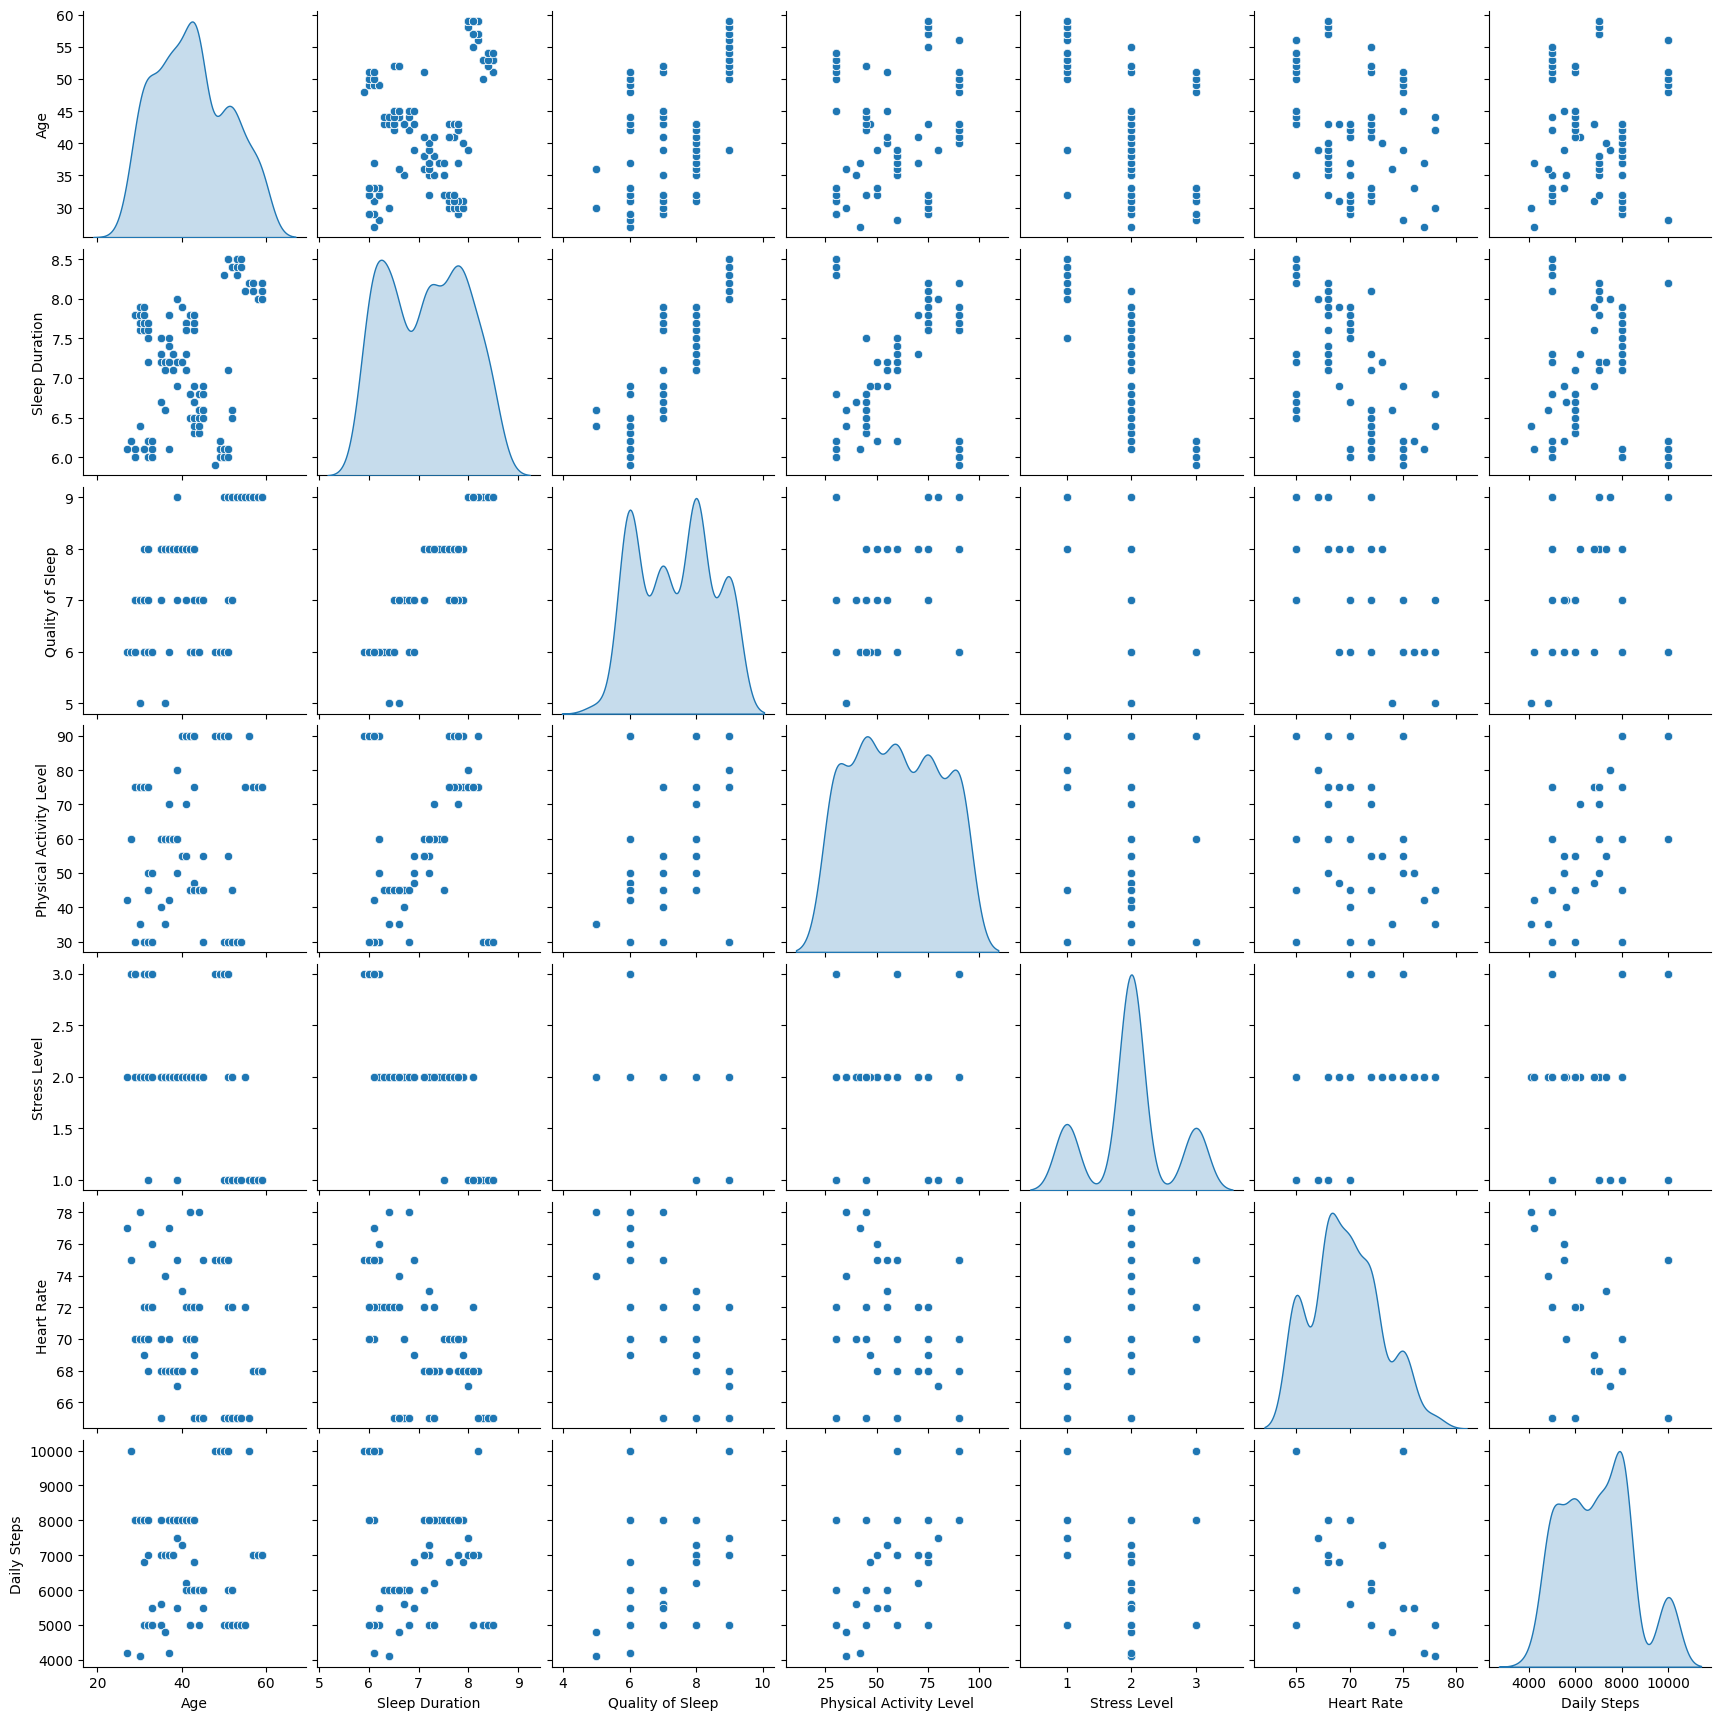

In [ ]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(df_clean, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

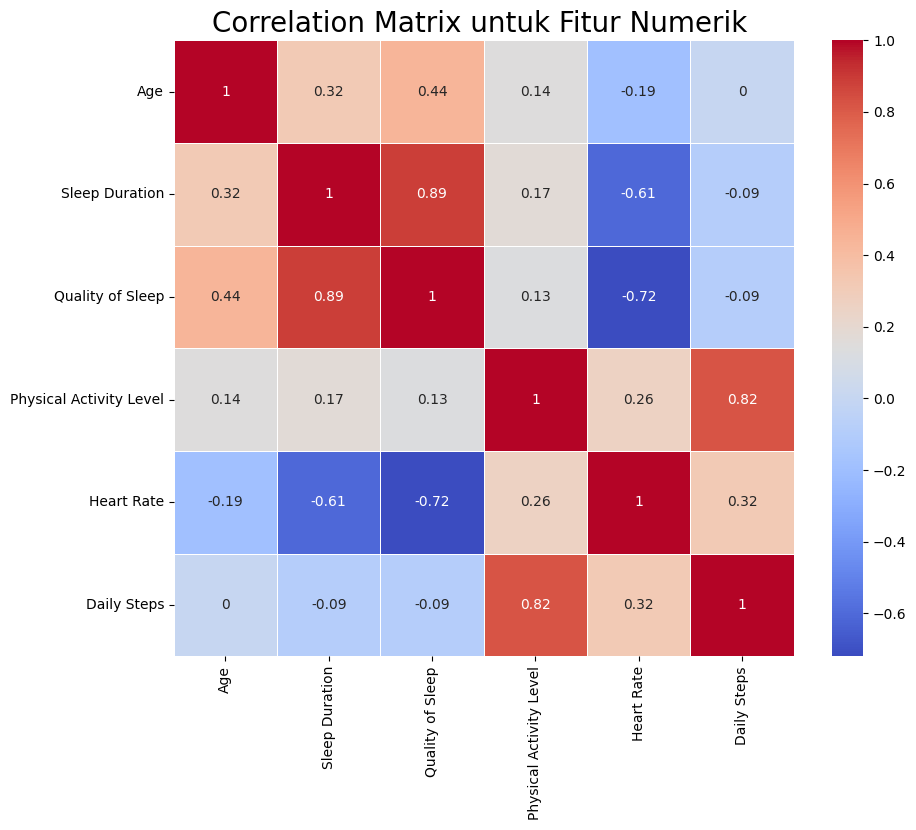

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_clean[numerical_features].corr().round(2)

# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

# Data Preparation

## Encoding Data Categorical

In [ ]:
from sklearn.preprocessing import  OneHotEncoder

df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['Gender'], prefix='Gender')],axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['Occupation'], prefix='Occupation')],axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['BMI Category'], prefix='BMI Category')],axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['Blood Pressure'], prefix='Blood Pressure')],axis=1)
df_clean = pd.concat([df_clean, pd.get_dummies(df_clean['Sleep Disorder'], prefix='Sleep Disorder')],axis=1)
df_clean.drop(['Gender','Occupation','BMI Category', 'Blood Pressure', 'Sleep Disorder'], axis=1, inplace=True)
df_clean.head()

,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps,Gender_Female,Gender_Male,Occupation_Accountant,...,Blood Pressure_128/84,Blood Pressure_128/85,Blood Pressure_129/84,Blood Pressure_130/85,Blood Pressure_130/86,Blood Pressure_135/90,Blood Pressure_140/95,Sleep Disorder_0,Sleep Disorder_Insomnia,Sleep Disorder_Sleep Apnea
0,27,6.1,6,42,2,77,4200,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,28,6.2,6,60,3,75,10000,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,28,6.2,6,60,3,75,10000,False,True,False,...,False,False,False,False,False,False,False,True,False,False
7,29,7.8,7,75,2,70,8000,False,True,False,...,False,False,False,False,False,False,False,True,False,False
8,29,7.8,7,75,2,70,8000,False,True,False,...,False,False,False,False,False,False,False,True,False,False


## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

X = df_clean.drop(columns=["Stress Level"])
y = df_clean["Stress Level"]

scaler = MinMaxScaler()
X_scaler = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaler, y)

pca = PCA(n_components= 0.95)
X_pca = pca.fit_transform(X_resampled)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size= 0.2, random_state= 42)

In [ ]:
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in train dataset: 540
Total # of sample in test dataset: 135


# Model Development

Pada tahap ini, kita akan mengembangkan model machine learning dengan dua algoritma. Kemudian, kita akan mengevaluasi performa masing-masing algoritma dan menentukan algoritma mana yang memberikan hasil prediksi terbaik. Kedua algoritma yang akan kita gunakan, antara lain:
- Random Forest
- Decission Tree

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier(n_estimators=100, max_depth=10,
                           min_samples_leaf=5, random_state=42)
rf.fit(X_train, y_train)
y_train_rf = rf.predict(X_train)
y_test_rf = rf.predict(X_test)
train_acc = accuracy_score(y_train, y_train_rf)
test_acc = accuracy_score(y_test, y_test_rf)
cv_scores = cross_val_score(rf, X_train, y_train, cv=5)

print(f"Accuracy Data Training: {train_acc:.2f}")
print(f"Accuracy Data Testing: {test_acc:.2f}")
print(f"Mean CV Score:{cv_scores.mean():.2f}")
print(classification_report(y_test, y_test_rf))

Accuracy Data Training: 0.99
Accuracy Data Testing: 0.99
Mean CV Score:0.99
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        34
           2       0.98      1.00      0.99        49
           3       1.00      1.00      1.00        52

    accuracy                           0.99       135
   macro avg       0.99      0.99      0.99       135
weighted avg       0.99      0.99      0.99       135



## Decission Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=10, random_state=42)
dt.fit(X_train, y_train)
y_train_dt = dt.predict(X_train)
y_test_dt = dt.predict(X_test)

train_acc_dt = accuracy_score(y_train, y_train_dt)
test_acc_dt = accuracy_score(y_test, y_test_dt)
cv_scores_dt = cross_val_score(dt, X_train, y_train, cv=5)

print(f"Accuracy Data Training: {train_acc_dt:.2f}")
print(f"Accuracy Data Testing: {test_acc_dt:.2f}")
print(f"Mean CV Score:{cv_scores_dt.mean():.2f}")
print(classification_report(y_test, y_test_dt))

Accuracy Data Training: 1.00
Accuracy Data Testing: 0.99
Mean CV Score:0.99
              precision    recall  f1-score   support

           1       1.00      0.97      0.99        34
           2       0.98      0.98      0.98        49
           3       0.98      1.00      0.99        52

    accuracy                           0.99       135
   macro avg       0.99      0.98      0.99       135
weighted avg       0.99      0.99      0.99       135



# Perbandingan Model

In [ ]:
# Perbandingan akurasi
acc_rf = accuracy_score(y_test, y_test_rf)
acc_dt = accuracy_score(y_test, y_test_dt)

print(f"Akurasi Random Forest: {acc_rf:.3f}")
print(f"Akurasi Decision Tree: {acc_dt:.3f}")

Akurasi Random Forest: 0.993
Akurasi Decision Tree: 0.985


📊 Hasil Perbandingan Model:

               Accuracy  Precision    Recall  F1 Score
Random Forest  1.000000   1.000000  1.000000  1.000000
Decision Tree  0.985185   0.986908  0.983393  0.985048


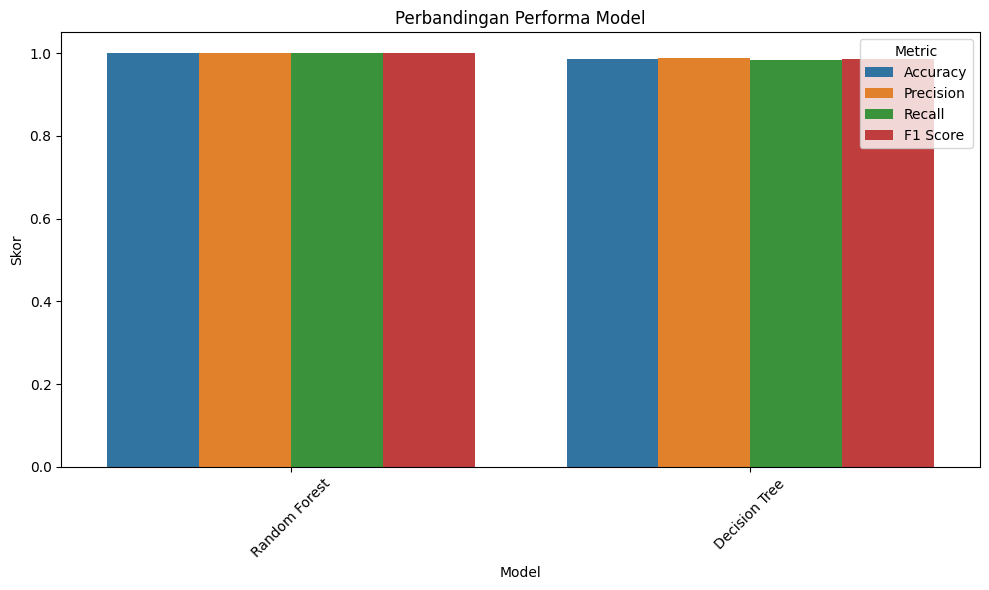

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Dictionary untuk menyimpan hasil evaluasi
model_scores = {}

# Fungsi evaluasi dan pencatatan skor
def evaluate_and_store(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Simpan skor dalam dictionary
    model_scores[model_name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1 Score': f1_score(y_test, y_pred, average='macro')
    }

# Evaluasi semua model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_and_store(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_and_store(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")

# Menampilkan hasil perbandingan
import pandas as pd

results_df = pd.DataFrame(model_scores).T
results_df = results_df.sort_values(by="Accuracy", ascending=False)  # Urutkan berdasarkan akurasi
print("📊 Hasil Perbandingan Model:\n")
print(results_df)

# Opsional: visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=results_df.reset_index().melt(id_vars='index'), x='index', y='value', hue='variable')
plt.title("Perbandingan Performa Model")
plt.xlabel("Model")
plt.ylabel("Skor")
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

Dari keempat diagram, Random Forest mengungguli Decission Tree menjadikan Random Forest sebagai model yang lebih baik secara keseluruhan.

Model Random Forest adalah model terbaik dalam studi ini karena mampu memberikan:


*  Akurasi yang tinggi
*  Precision yang sangat baik
*   Keseimbangan recall dan F1 score



# Fitur

## Prediksi Stress berdasarkan inputan yang diberikan

In [ ]:
import pickle
import pandas as pd

with open("feature_names.pkl", "wb") as f:
    pickle.dump(X.columns.tolist(), f)

print("Feature names saved to feature_names.pkl")

Feature names saved to feature_names.pkl


In [ ]:
import pandas as pd
import pickle

# Fungsi preprocessing sederhana
def preprocess(df, expected_features):
    df_encoded = df.copy()

    # Normalisasi input teks
    df_encoded['Gender'] = df_encoded['Gender'].str.capitalize()
    df_encoded['BMI Category'] = df_encoded['BMI Category'].str.capitalize()
    df_encoded['Sleep Disorder'] = df_encoded['Sleep Disorder'].str.title()
    df_encoded['Occupation'] = df_encoded['Occupation'].str.lower()

    # Mapping gender
    gender_map = {'Male': 1, 'Female': 0}
    if df_encoded['Gender'].iloc[0] not in gender_map:
        raise ValueError(f"Gender tidak valid: {df_encoded['Gender'].iloc[0]}")
    df_encoded['Gender'] = df_encoded['Gender'].map(gender_map)

    # Mapping BMI
    bmi_map = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
    if df_encoded['BMI Category'].iloc[0] not in bmi_map:
        raise ValueError(f"BMI Category tidak valid: {df_encoded['BMI Category'].iloc[0]}")
    df_encoded['BMI Category'] = df_encoded['BMI Category'].map(bmi_map)

    # Mapping sleep disorder
    sleep_map = {'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2}
    if df_encoded['Sleep Disorder'].iloc[0] not in sleep_map:
        raise ValueError(f"Sleep Disorder tidak valid: {df_encoded['Sleep Disorder'].iloc[0]}")
    df_encoded['Sleep Disorder'] = df_encoded['Sleep Disorder'].map(sleep_map)

    # Occupation one-hot encoding
    known_occupations = ['doctor', 'nurse', 'engineer', 'teacher', 'lawyer', 'student', 'manager', 'scientist', 'salesman']
    occupation_input = df_encoded['Occupation'].iloc[0]
    if occupation_input not in known_occupations:
        raise ValueError(f"Occupation tidak valid: {occupation_input}")

    for occ in known_occupations:
        df_encoded[f"Occupation_{occ}"] = 1 if occupation_input == occ else 0
    df_encoded.drop(columns='Occupation', inplace=True)

    # Tambahkan kolom yang hilang dari expected_features
    for col in expected_features:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Susun ulang sesuai urutan saat training
    df_encoded = df_encoded[expected_features]

    return df_encoded

# Fungsi prediksi
def infer_stress_level(model, scaler, pca, feature_names_path="feature_names.pkl"):
    print("Masukkan data berikut untuk memprediksi Level Stres Anda:\n")

    try:
        # Ambil input
        gender = input("Gender (Male/Female): ")
        age = int(input("Usia: "))
        occupation = input("Pekerjaan: ")
        sleep_duration = float(input("Durasi tidur (jam): "))
        quality_sleep = int(input("Kualitas tidur (1-10): "))
        physical_activity = int(input("Level aktivitas fisik (1-100): "))
        bmi_category = input("Kategori BMI (Underweight/Normal/Overweight/Obese): ")
        blood_pressure = input("Tekanan darah (format sistolik/diaslitik, misal 120/80): ")
        heart_rate = int(input("Detak jantung (bpm): "))
        daily_steps = int(input("Jumlah langkah harian: "))
        sleep_disorder = input("Gangguan tidur (isi 'None' jika tidak ada): ")

        # Pisahkan tekanan darah
        systolic, diastolic = map(int, blood_pressure.split('/'))

        # Buat dataframe dari input
        fitur_input = pd.DataFrame([[gender, age, occupation, sleep_duration, quality_sleep,
                                     physical_activity, bmi_category, systolic, diastolic,
                                     heart_rate, daily_steps, sleep_disorder]],
                                   columns=['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
                                            'Physical Activity Level', 'BMI Category',
                                            'Systolic BP', 'Diastolic BP', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'])

        # Load daftar fitur dari training
        with open(feature_names_path, "rb") as f:
            expected_features = pickle.load(f)

        # Preprocessing + sesuaikan fitur
        fitur_input_encoded = preprocess(fitur_input, expected_features)
        fitur_input_scaled = scaler.transform(fitur_input_encoded)
        fitur_input_pca = pca.transform(fitur_input_scaled)

        # Prediksi
        pred_label = model.predict(fitur_input_pca)[0]
        mapping = {1: "Rendah", 2: "Sedang", 3: "Tinggi"}
        hasil = mapping.get(pred_label, "Tidak diketahui")

        print(f"\n📊 Prediksi Level Stres Anda adalah: {pred_label} ({hasil})")

    except ValueError as ve:
        print(f"Input tidak valid: {ve}")
    except Exception as e:
        print(f"Terjadi kesalahan: {e}")

In [ ]:
infer_stress_level(dt_model, scaler, pca)

Masukkan data berikut untuk memprediksi Level Stres Anda:

Gender (Male/Female): male
Usia: 20
Pekerjaan: doctor
Durasi tidur (jam): 7
Kualitas tidur (1-10): 5
Level aktivitas fisik (1-100): 50
Kategori BMI (Underweight/Normal/Overweight/Obese): normal
Tekanan darah (format sistolik/diaslitik, misal 120/80): 120/80
Detak jantung (bpm): 80
Jumlah langkah harian: 1000
Gangguan tidur (isi 'None' jika tidak ada): none

📊 Prediksi Level Stres Anda adalah: 2 (Sedang)


In [ ]:
import pandas as pd
import pickle

# Fungsi preprocessing sederhana
def preprocess(df, expected_features):
    df_encoded = df.copy()

    # Normalisasi input teks
    df_encoded['Gender'] = df_encoded['Gender'].str.capitalize()
    df_encoded['BMI Category'] = df_encoded['BMI Category'].str.capitalize()
    df_encoded['Sleep Disorder'] = df_encoded['Sleep Disorder'].str.title()
    df_encoded['Occupation'] = df_encoded['Occupation'].str.lower()

    # Mapping gender
    gender_map = {'Male': 1, 'Female': 0}
    if df_encoded['Gender'].iloc[0] not in gender_map:
        raise ValueError(f"Gender tidak valid: {df_encoded['Gender'].iloc[0]}")
    df_encoded['Gender'] = df_encoded['Gender'].map(gender_map)

    # Mapping BMI
    bmi_map = {'Underweight': 0, 'Normal': 1, 'Overweight': 2, 'Obese': 3}
    if df_encoded['BMI Category'].iloc[0] not in bmi_map:
        raise ValueError(f"BMI Category tidak valid: {df_encoded['BMI Category'].iloc[0]}")
    df_encoded['BMI Category'] = df_encoded['BMI Category'].map(bmi_map)

    # Mapping sleep disorder
    sleep_map = {'None': 0, 'Insomnia': 1, 'Sleep Apnea': 2}
    if df_encoded['Sleep Disorder'].iloc[0] not in sleep_map:
        raise ValueError(f"Sleep Disorder tidak valid: {df_encoded['Sleep Disorder'].iloc[0]}")
    df_encoded['Sleep Disorder'] = df_encoded['Sleep Disorder'].map(sleep_map)

    # Occupation one-hot encoding
    known_occupations = ['doctor', 'nurse', 'engineer', 'teacher', 'lawyer', 'student', 'manager', 'scientist', 'salesman']
    occupation_input = df_encoded['Occupation'].iloc[0]
    if occupation_input not in known_occupations:
        raise ValueError(f"Occupation tidak valid: {occupation_input}")

    for occ in known_occupations:
        df_encoded[f"Occupation_{occ}"] = 1 if occupation_input == occ else 0
    df_encoded.drop(columns='Occupation', inplace=True)

    # Tambahkan kolom yang hilang dari expected_features
    for col in expected_features:
        if col not in df_encoded.columns:
            df_encoded[col] = 0

    # Susun ulang sesuai urutan saat training
    df_encoded = df_encoded[expected_features]

    return df_encoded

# Fungsi untuk load model dan komponen dari file pkl
def load_model_components(model_path="stress_model.pkl",
                         scaler_path="scaler.pkl",
                         pca_path="pca.pkl",
                         feature_names_path="feature_names.pkl"):
    """
    Load model, scaler, PCA, dan feature names dari file pickle
    """
    try:
        # Load model
        with open(model_path, "rb") as f:
            model = pickle.load(f)
        print(f"✅ Model berhasil dimuat dari {model_path}")

        # Load scaler
        with open(scaler_path, "rb") as f:
            scaler = pickle.load(f)
        print(f"✅ Scaler berhasil dimuat dari {scaler_path}")

        # Load PCA
        with open(pca_path, "rb") as f:
            pca = pickle.load(f)
        print(f"✅ PCA berhasil dimuat dari {pca_path}")

        # Load feature names
        with open(feature_names_path, "rb") as f:
            feature_names = pickle.load(f)
        print(f"✅ Feature names berhasil dimuat dari {feature_names_path}")

        return model, scaler, pca, feature_names

    except FileNotFoundError as e:
        print(f"❌ File tidak ditemukan: {e}")
        return None, None, None, None
    except Exception as e:
        print(f"❌ Error saat memuat file: {e}")
        return None, None, None, None

# Fungsi prediksi yang telah dimodifikasi
def infer_stress_level(model_path="stress_model.pkl",
                      scaler_path="scaler.pkl",
                      pca_path="pca.pkl",
                      feature_names_path="feature_names.pkl"):
    """
    Fungsi untuk memprediksi level stress dengan model yang dimuat dari file pkl
    """
    print("=== PREDIKSI LEVEL STRESS ===")
    print("Masukkan data berikut untuk memprediksi Level Stres Anda:\n")

    # Load semua komponen model
    model, scaler, pca, expected_features = load_model_components(
        model_path, scaler_path, pca_path, feature_names_path
    )

    if model is None:
        print("❌ Gagal memuat model. Pastikan semua file pkl tersedia.")
        return

    try:
        # Ambil input dari user
        print("📝 Silakan masukkan data Anda:")
        gender = input("Gender (Male/Female): ")
        age = int(input("Usia: "))
        occupation = input("Pekerjaan: ")
        sleep_duration = float(input("Durasi tidur (jam): "))
        quality_sleep = int(input("Kualitas tidur (1-10): "))
        physical_activity = int(input("Level aktivitas fisik (1-100): "))
        bmi_category = input("Kategori BMI (Underweight/Normal/Overweight/Obese): ")
        blood_pressure = input("Tekanan darah (format sistolik/diastolik, misal 120/80): ")
        heart_rate = int(input("Detak jantung (bpm): "))
        daily_steps = int(input("Jumlah langkah harian: "))
        sleep_disorder = input("Gangguan tidur (isi 'None' jika tidak ada): ")

        # Pisahkan tekanan darah
        systolic, diastolic = map(int, blood_pressure.split('/'))

        # Buat dataframe dari input
        fitur_input = pd.DataFrame([[gender, age, occupation, sleep_duration, quality_sleep,
                                     physical_activity, bmi_category, systolic, diastolic,
                                     heart_rate, daily_steps, sleep_disorder]],
                                   columns=['Gender', 'Age', 'Occupation', 'Sleep Duration', 'Quality of Sleep',
                                            'Physical Activity Level', 'BMI Category',
                                            'Systolic BP', 'Diastolic BP', 'Heart Rate', 'Daily Steps', 'Sleep Disorder'])

        # Preprocessing + sesuaikan fitur
        print("\n🔄 Memproses data...")
        fitur_input_encoded = preprocess(fitur_input, expected_features)
        fitur_input_scaled = scaler.transform(fitur_input_encoded)
        fitur_input_pca = pca.transform(fitur_input_scaled)

        # Prediksi
        print("🔮 Melakukan prediksi...")
        pred_label = model.predict(fitur_input_pca)[0]

        # Mapping hasil prediksi
        mapping = {1: "Rendah", 2: "Sedang", 3: "Tinggi"}
        hasil = mapping.get(pred_label, "Tidak diketahui")

        print(f"\n📊 HASIL PREDIKSI:")
        print(f"Level Stres Anda: {pred_label} ({hasil})")

        # Tambahan: probabilitas prediksi jika model mendukung
        try:
            pred_proba = model.predict_proba(fitur_input_pca)[0]
            print(f"\n📈 Probabilitas per kategori:")
            for i, prob in enumerate(pred_proba, 1):
                kategori = mapping.get(i, f"Kategori {i}")
                print(f"  {kategori}: {prob:.2%}")
        except AttributeError:
            print("(Model tidak mendukung predict_proba)")

    except ValueError as ve:
        print(f"❌ Input tidak valid: {ve}")
    except Exception as e:
        print(f"❌ Terjadi kesalahan: {e}")

# Fungsi untuk menyimpan model ke format pkl
def save_model_to_pkl(model, scaler, pca, feature_names,
                     model_path="stress_model.pkl",
                     scaler_path="scaler.pkl",
                     pca_path="pca.pkl",
                     feature_names_path="feature_names.pkl"):
    """
    Fungsi untuk menyimpan model dan komponen ke file pkl
    """
    try:
        # Simpan model
        with open(model_path, "wb") as f:
            pickle.dump(model, f)
        print(f"✅ Model disimpan ke {model_path}")

        # Simpan scaler
        with open(scaler_path, "wb") as f:
            pickle.dump(scaler, f)
        print(f"✅ Scaler disimpan ke {scaler_path}")

        # Simpan PCA
        with open(pca_path, "wb") as f:
            pickle.dump(pca, f)
        print(f"✅ PCA disimpan ke {pca_path}")

        # Simpan feature names
        with open(feature_names_path, "wb") as f:
            pickle.dump(feature_names, f)
        print(f"✅ Feature names disimpan ke {feature_names_path}")

        print("🎉 Semua komponen berhasil disimpan!")

    except Exception as e:
        print(f"❌ Error saat menyimpan: {e}")
